# Upgrading Upwork

# Abstract

My project aims to facilitate the freelancer's job seeking journey, by revealing what the job market looks like for their particular field, and guide them towards what skills they should attain to be remain competitive and build a their portfolios more effectively.



# Recap

Upwork is an electronic freelancer platform that connects employers to freelancers, facilitating the job seeking process for many different kinds of jobs. 

From video editing to writing to photography to more technologically driven fields like web development, data science, and machine learning, Upwork has a wide variety of jobs available for freelancers to apply to.

# The Dataset


The dataset, created by Ahmed Myalo (https://www.kaggle.com/datasets/ahmedmyalo/upwork-freelance-jobs-60k?select=Final_Upwork_Dataset.csv), shows the job titles, descriptions, main categories and sub categories for each job entry. They also include expertise level, expected payment.

It's time for some EDA. I will focus on extracting insight from the most popular categories with some NLP and visualization.

Each job has a main category (Category_1) and 8 sub categories (Category_2 - Category_9). It is sensible to assume that the main category is the most important category, and the sub categories are less important.

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
main_df = pd.read_csv(r"C:\Users\pat laptop\Desktop\upwork\Final_Upwork_Dataset.csv")

In [54]:
main_df.head()

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,...,Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate
0,Power bi specialist freelance,https://www.upwork.com/jobs/Power-specialist-f...,Expert,NaN,Data_science,5 minutes ago,Already data pooled and designed. Need to refi...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,data,...,United States,6.0,12.0,NaN,0.0,Fixed-price,"$2,500",NaN,0,NaN
1,Case Study (on-demand delivery startup),https://www.upwork.com/jobs/Case-Study-demand-...,Intermediate,NaN,Data_science,5 minutes ago,"Hi,\n\nWould you be able to help me do a case-...",https://www.upwork.com/nx/jobs/search/?ontolog...,Google Data Studio,Google Data Studio,...,Canada,4.0,8.0,5.000000,1.0,Fixed-price,$200,NaN,0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",https://www.upwork.com/jobs/File-Maker-Pro-Rep...,Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,https://www.upwork.com/nx/jobs/search/?ontolog...,Report Writing,NaN,...,United States,6.0,12.0,5.000000,1.0,Hourly,NaN,$40.00,40,NaN
3,Implementation of EleutherAI/gpt-neox-20b,https://www.upwork.com/jobs/Implementation-Ele...,Expert,"3 to 6 months, Less than 30 hrs/week",Data_science,12 minutes ago,"As a first step, you will implement the instal...",https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning Model,NaN,...,Canada,6.0,12.0,4.935536,26.0,Hourly,NaN,$35.00-$100.00,$35.00,$100.00
4,BI and Data Engineer for Upwork Finance System...,https://www.upwork.com/jobs/and-span-Data-span...,Expert,"More than 6 months, 30+ hrs/week",Data_science,14 minutes ago,The Upwork Finance Systems team is looking for...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,Data,...,United States,6.0,12.0,4.942242,12512.0,Hourly,NaN,NaN,0,NaN


In [121]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63950 entries, 0 to 63949
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             63948 non-null  object 
 1   Job_URL               63949 non-null  object 
 2   EX_level_demand       56935 non-null  object 
 3   Time_Limitation       23034 non-null  object 
 4   Search_Keyword        63949 non-null  object 
 5   Posted_from           63913 non-null  object 
 6   Description           63948 non-null  object 
 7   Category1_URL_search  63505 non-null  object 
 8   Category_1            63505 non-null  object 
 9   highlight             50131 non-null  object 
 10  Category2_URL_search  59889 non-null  object 
 11  Category_2            59889 non-null  object 
 12  Category3_URL_search  54997 non-null  object 
 13  Category_3            54997 non-null  object 
 14  Category4_URL_search  47543 non-null  object 
 15  Category_4         

In [233]:
print("Category 1:", main_df.iloc[1337]["Category_1"])
print("Category 2:", main_df.iloc[1337]["Category_2"])
print("Category 3:", main_df.iloc[1337]["Category_3"])
print("Category 4:", main_df.iloc[1337]["Category_4"])
print("Category 5:", main_df.iloc[1337]["Category_5"])
print("Category 6:", main_df.iloc[1337]["Category_6"])
print("Category 7:", main_df.iloc[1337]["Category_7"])
print("Category 8:", main_df.iloc[1337]["Category_8"])
print("Category 9:", main_df.iloc[1337]["Category_9"])


Category 1: Data Science
Category 2: Academic Writing
Category 3: Mathematics
Category 4: Research Papers
Category 5: Statistics
Category 6: Economics
Category 7: nan
Category 8: nan
Category 9: nan


The dataset contains many columns that are not relevant for now, so I will not consider them. The Category_URL columns for example will not be of use in any case. 

Columns like Connects_Num, Applicants_Num and Hourly_Rate could be useful for future analysis in order to predict how these change depending on the type of job, but the scope of the project focuses on predicting job descriptions and titles.

In this sprint's EDA, I will get a better feel for what are the most common categories and what sub categories are most common within each category.

# EDA AND DATA CLEANING

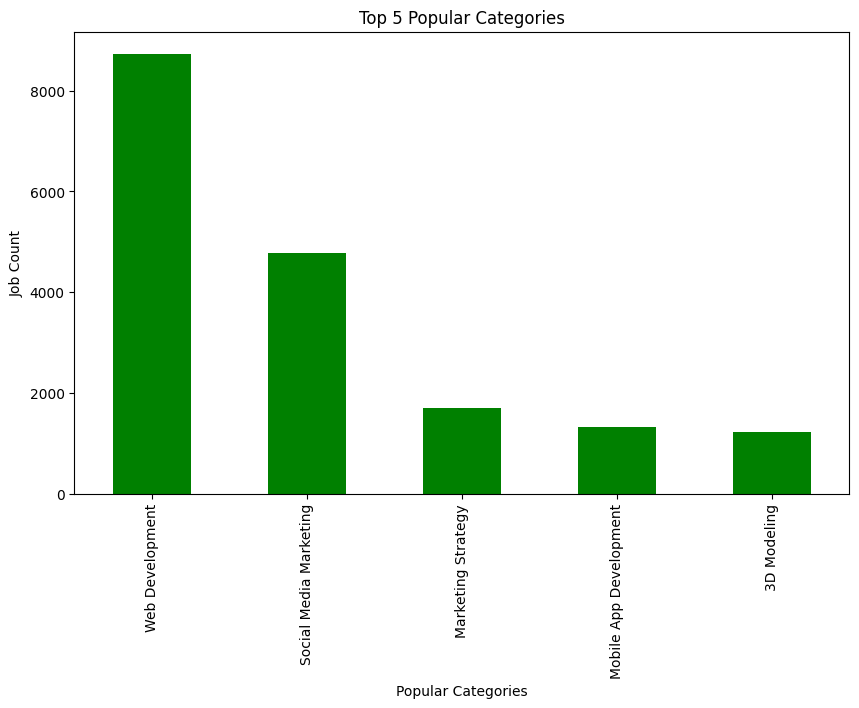

In [122]:
plt.figure(figsize=(10, 6))
main_df["Category_1"].value_counts().head(5).plot(kind="bar", color="green")
plt.xlabel('Popular Categories')
plt.ylabel('Job Count')
plt.title('Top 5 Popular Categories')
plt.show()


We can see how the top 5 categories jobs are spread out.

The most common categorries are:
* Web Development
* Social Media Marketing
* Marketing Strategy
* Mobile App Development
* 3D Modeling

I will focus on 3D modeling as an example which aligns with my own interests given this dataset.

Let's see how these two ends compare.

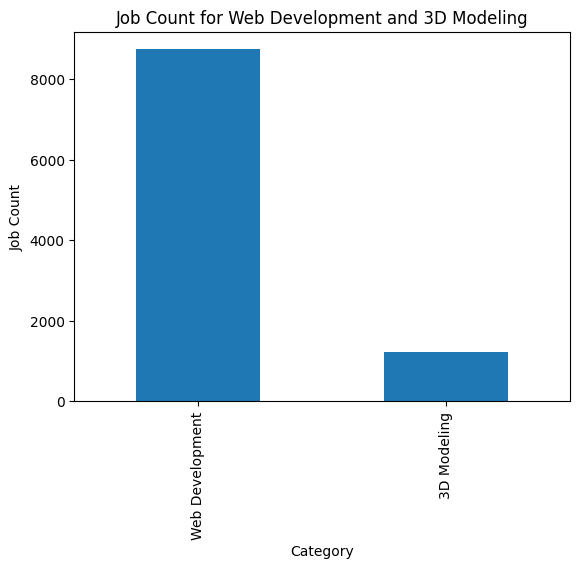

In [145]:
filtered_df = main_df[main_df["Category_1"].isin(["Web Development", "3D Modeling"])]
filtered_df["Category_1"].value_counts().plot(kind="bar")
plt.xlabel('Category')
plt.ylabel('Job Count')
plt.title('Job Count for Web Development and 3D Modeling')
plt.show()

I will extract the top category column names and create a new dataframe for each top category.

In [125]:
top_category_columns = main_df["Category_1"].value_counts().head(5)

top_column_names = []
for i in range(0, len(top_category_columns)):
    top_category_columns.keys()[i]
    top_column_names.append(top_category_columns.keys()[i])
top_column_names

['Web Development',
 'Social Media Marketing',
 'Marketing Strategy',
 'Mobile App Development',
 '3D Modeling']

In [138]:
condition1 = main_df["Category_1"] == top_column_names[0]
condition2 = main_df["Category_1"] == top_column_names[1]
condition3 = main_df["Category_1"] == top_column_names[2]
condition4 = main_df["Category_1"] == top_column_names[3]
condition5 = main_df["Category_1"] == top_column_names[4]

In [139]:
df_webdev = main_df[condition1]
df_social_media_marketing = main_df[condition2]
df_marketing_strategy = main_df[condition3]
df_mobile_app = main_df[condition4]
df_3d_modeling = main_df[condition5]

Let's view the top 5 Category_2 for each main Category.

In [140]:
print(df_webdev["Category_2"].value_counts().head(5))
print("***")
print(df_social_media_marketing["Category_2"].value_counts().head(5))
print("***")
print(df_marketing_strategy["Category_2"].value_counts().head(5))
print("***")
print(df_mobile_app["Category_2"].value_counts().head(5))
print("***")
print(df_3d_modeling["Category_2"].value_counts().head(5))


Category_2
WordPress                         1613
Web Design                         944
Shopify                            468
JavaScript                         415
Ecommerce Platform Development     302
Name: count, dtype: int64
***
Category_2
Marketing Strategy         952
Facebook                   407
Social Media Management    289
Internet Marketing         277
Instagram                  246
Name: count, dtype: int64
***
Category_2
Social Media Marketing    498
Internet Marketing        127
Market Analysis            60
Email Marketing            56
B2B Marketing              53
Name: count, dtype: int64
***
Category_2
Android App Development    410
iOS Development            194
Android                    105
iOS                         65
React Native                63
Name: count, dtype: int64
***
Category_2
3D Design           364
3D Rendering        279
3D Animation         60
3D Printing          28
Autodesk AutoCAD     23
Name: count, dtype: int64


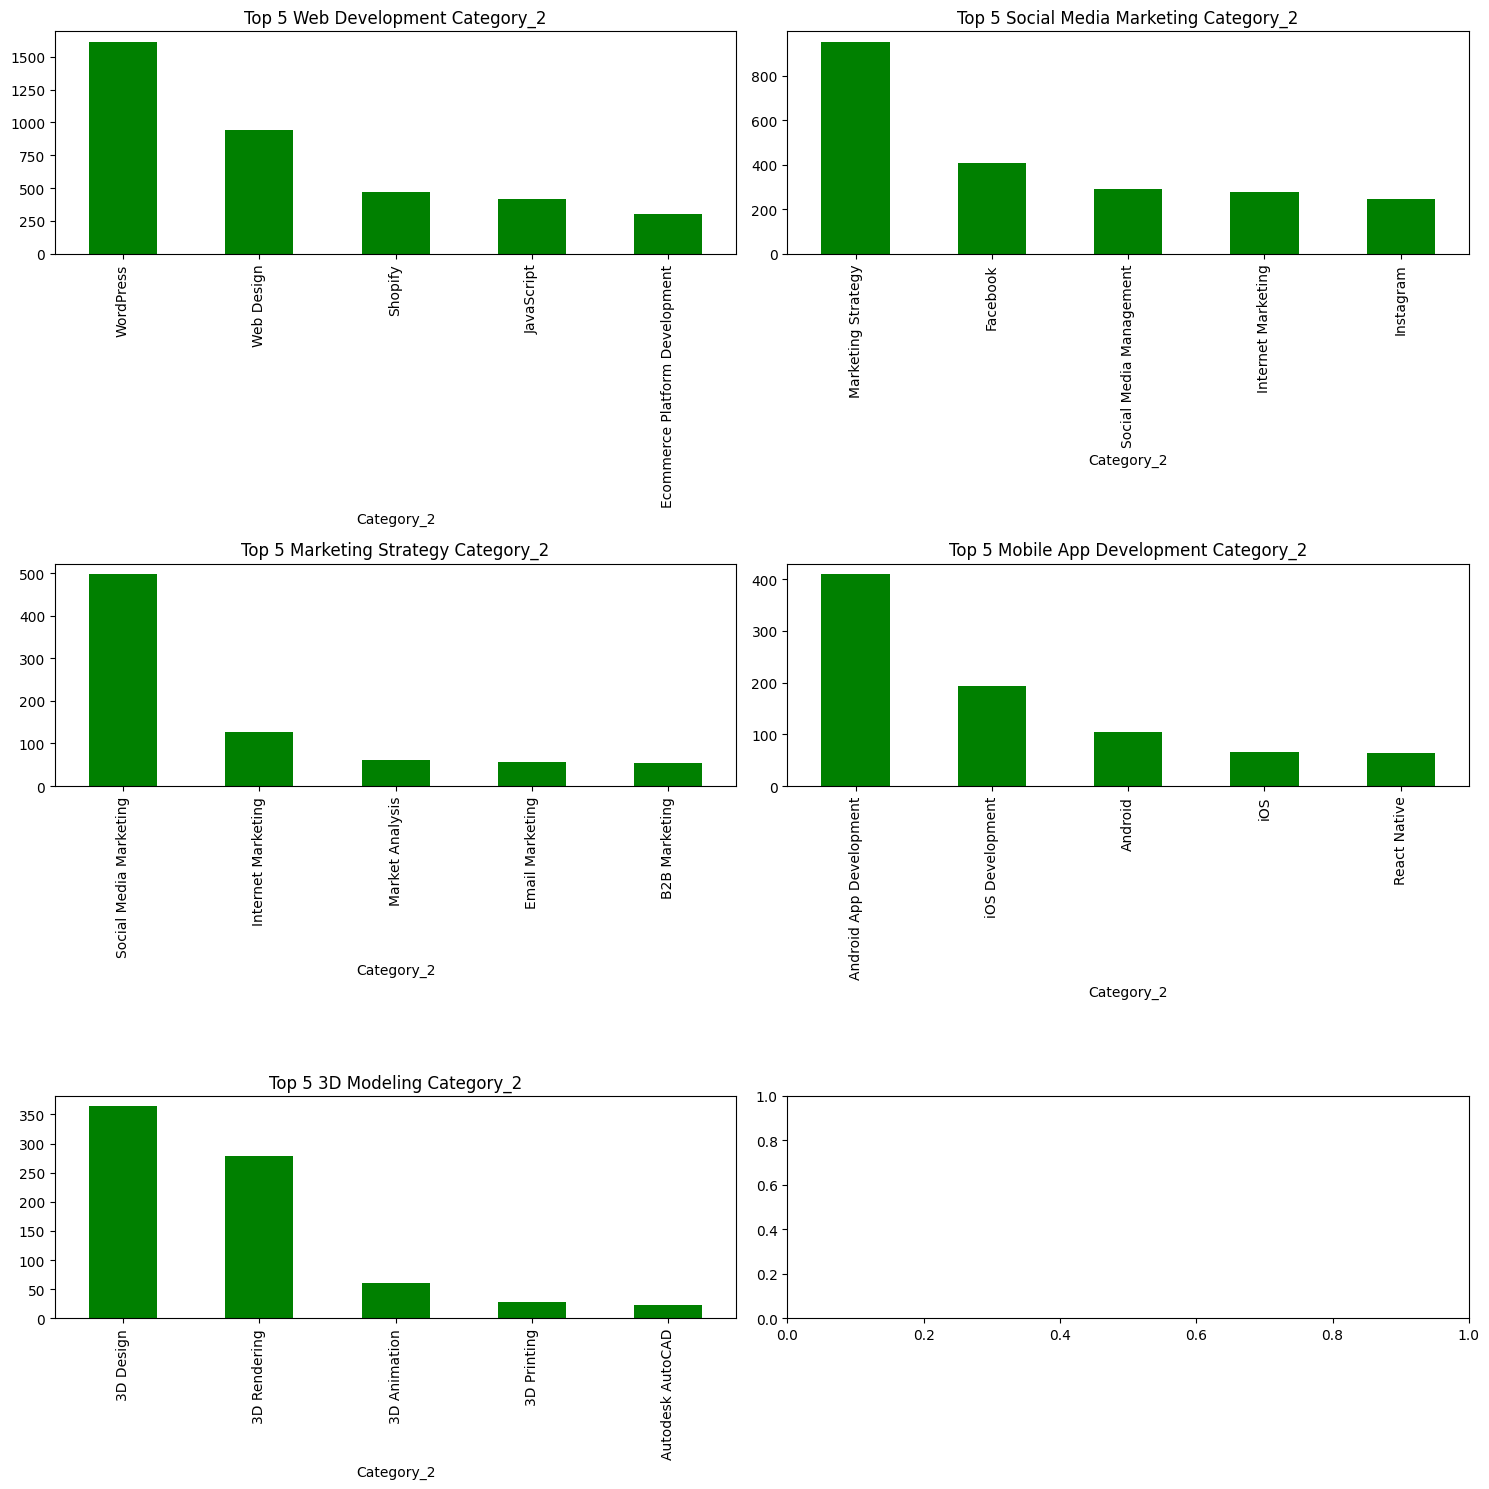

In [210]:
top5_webdev = df_webdev['Category_2'].value_counts().head(5)
top5_social_media = df_social_media_marketing['Category_2'].value_counts().head(5)
top5_marketing_strategy = df_marketing_strategy['Category_2'].value_counts().head(5)
top5_mobile_app = df_mobile_app['Category_2'].value_counts().head(5)
top5_3d_modeling = df_3d_modeling['Category_2'].value_counts().head(5)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

top5_webdev.plot(kind='bar', ax=axes[0, 0], title='Top 5 Web Development Category_2', color='green')
top5_social_media.plot(kind='bar', ax=axes[0, 1], title='Top 5 Social Media Marketing Category_2', color="green")
top5_marketing_strategy.plot(kind='bar', ax=axes[1, 0], title='Top 5 Marketing Strategy Category_2', color="green")
top5_mobile_app.plot(kind='bar', ax=axes[1, 1], title='Top 5 Mobile App Development Category_2', color="green")
top5_3d_modeling.plot(kind='bar', ax=axes[2, 0], title='Top 5 3D Modeling Category_2', color="green")

plt.tight_layout()

plt.show()

Let's see how each sub category is doing in terms of missing values. 

In [142]:
dataframes = {
    'Web Development': df_webdev, 
    'Social Media Marketing': df_social_media_marketing, 
    'Marketing Strategy': df_marketing_strategy, 
    'Mobile App': df_mobile_app, 
    '3D Modeling': df_3d_modeling
}

for df_name, df in dataframes.items():
    print(f"NaN Counts in {df_name}:")
    for col in ['Category_2', 'Category_3', 'Category_4', 'Category_5', 'Category_6', 'Category_7', 'Category_8', 'Category_9']:
        if col in df.columns:
            nan_count = df[col].isna().sum()
            print(f"  {col}: {nan_count}")
    print("***")


NaN Counts in Web Development:
  Category_2: 132
  Category_3: 619
  Category_4: 1749
  Category_5: 2943
  Category_6: 4244
  Category_7: 5289
  Category_8: 6083
  Category_9: 6716
***
NaN Counts in Social Media Marketing:
  Category_2: 62
  Category_3: 214
  Category_4: 579
  Category_5: 1118
  Category_6: 1875
  Category_7: 2419
  Category_8: 2940
  Category_9: 3344
***
NaN Counts in Marketing Strategy:
  Category_2: 27
  Category_3: 79
  Category_4: 227
  Category_5: 406
  Category_6: 650
  Category_7: 847
  Category_8: 982
  Category_9: 1143
***
NaN Counts in Mobile App:
  Category_2: 34
  Category_3: 90
  Category_4: 224
  Category_5: 430
  Category_6: 614
  Category_7: 767
  Category_8: 917
  Category_9: 996
***
NaN Counts in 3D Modeling:
  Category_2: 20
  Category_3: 89
  Category_4: 238
  Category_5: 401
  Category_6: 561
  Category_7: 682
  Category_8: 779
  Category_9: 847
***


Keeping this in mind will be useful. Later while focusing on 3D modeling, the sub categories will be merged and analyzed in that way. If there is a heavy skew, perhaps imputing the categories from job titles would be a sensible approach.

Now, let's analyze the 3D Modeling category.

Let's see what are the most popular words in the job titles:

In [148]:
import re
from collections import Counter
from nltk.corpus import stopwords

# Get the titles column from the dataframe
titles = df_3d_modeling['Job Title']

# Concatenate all the titles into a single string
all_titles = ' '.join(titles)

# Split the string into individual words
words = re.findall(r'\w+', all_titles)

# Convert words to lowercase
words = [word.lower() for word in words]

# Filter out stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the top 20 most common words
top_20_words = word_counts.most_common(20)

# Print the top 20 common words
for word, count in top_20_words:
    print(word, count)


3d 483
design 231
designer 172
model 128
needed 92
product 89
create 72
modeling 71
interior 60
cad 59
looking 55
artist 48
rendering 45
need 44
project 40
engineer 38
game 36
character 32
building 31
models 31


There's a lot of words that could be removed, like "3D", "Needed", "Create", etc.

Let's see if this give us a better insight that simply looking at the sub categories that Upwork provides:

In [151]:
for i in range(2, 9):
    column_name = f"Category_{i}"
    print(df_3d_modeling[column_name].value_counts().head(5))


Category_2
3D Design           364
3D Rendering        279
3D Animation         60
3D Printing          28
Autodesk AutoCAD     23
Name: count, dtype: int64
Category_3
3D Rendering            172
3D Design               136
3D Animation             46
Architectural Design     40
Autodesk AutoCAD         35
Name: count, dtype: int64
Category_4
Architectural Design    53
Autodesk AutoCAD        53
3D Rendering            42
Adobe Photoshop         37
Product Design          32
Name: count, dtype: int64
Category_5
Autodesk 3ds Max    31
Blender             30
Autodesk AutoCAD    30
Product Design      28
Graphic Design      26
Name: count, dtype: int64
Category_6
Autodesk AutoCAD           36
Interior Design            25
Architectural Rendering    23
CAD                        20
2D Design & Drawings       18
Name: count, dtype: int64
Category_7
Autodesk AutoCAD           25
Architectural Rendering    19
Interior Design            18
Architectural Design       17
Product Design          

Let's get an idea of the totality of sub categories

In [97]:
# Assuming df_3d_modeling is your DataFrame and it has columns like 'Category_2', 'Category_3', etc.
all_categories = df_3d_modeling[['Category_2', 'Category_3', 'Category_4', 'Category_5', 'Category_6', 'Category_7', 'Category_8', "Category_9"]]
overall_counts = Counter()

for category in all_categories.columns:
    overall_counts.update(dict(all_categories[category].value_counts()))

overall_ranking = pd.Series(overall_counts).sort_values(ascending=False)

In [156]:
overall_ranking

3D Design               533
3D Rendering            499
Autodesk AutoCAD        231
Architectural Design    191
Product Design          163
                       ... 
Pattern Grading           1
Design Validation         1
Maxon BodyPaint 3D        1
Communications            1
Toon Boom Harmony         1
Length: 570, dtype: int64

Let's plot these for good measure

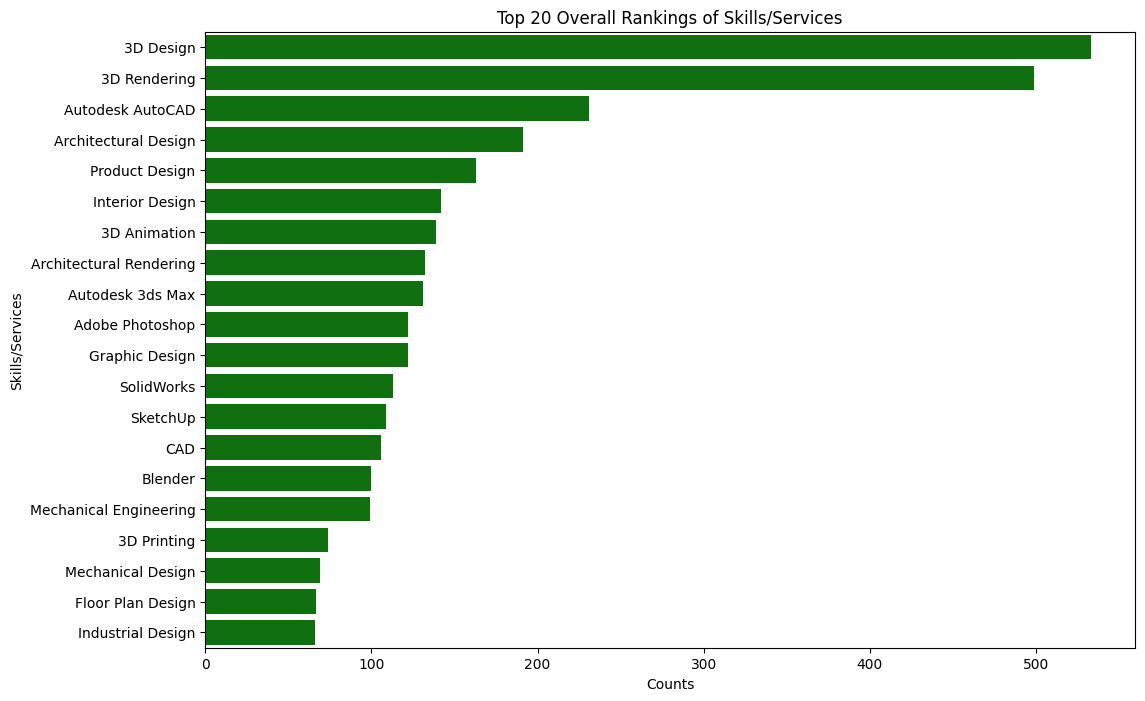

In [197]:
top_n = overall_ranking.head(20)  
plt.figure(figsize=(12, 8))  
sns.barplot(x=top_n.values, y=top_n.index, color="green") 
plt.title('Top 20 Overall Rankings of Skills/Services')
plt.xlabel('Counts')
plt.ylabel('Skills/Services')
plt.show()


# Heatmap of categories in 3D Modeling

Seeing where each term ranks on each sub category of how urgent the need is for each term is could reveal aspects about the market, from saught after skills to niches.

In [188]:
rankings = {category: df_3d_modeling[category].value_counts().rank(ascending=False) for category in all_categories.columns}
rankings_df = pd.DataFrame(rankings)
rankings_df

,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9
2D Animation,NaN,NaN,158.0,154.5,53.5,67.5,56.0,NaN
2D Design,46.0,42.5,25.0,25.0,10.5,32.5,56.0,20.5
2D Design & Drawings,NaN,50.0,43.5,15.5,5.0,12.5,18.5,51.0
2D Drafting,114.5,153.0,NaN,47.0,130.0,NaN,37.0,51.0
2D Landscape Drawing,NaN,NaN,NaN,154.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Wood Engraving,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN
WordPress,NaN,NaN,158.0,NaN,NaN,NaN,NaN,NaN
iClone,NaN,NaN,NaN,154.5,NaN,NaN,NaN,NaN
iOS,58.5,153.0,158.0,154.5,130.0,NaN,NaN,NaN


<Axes: >

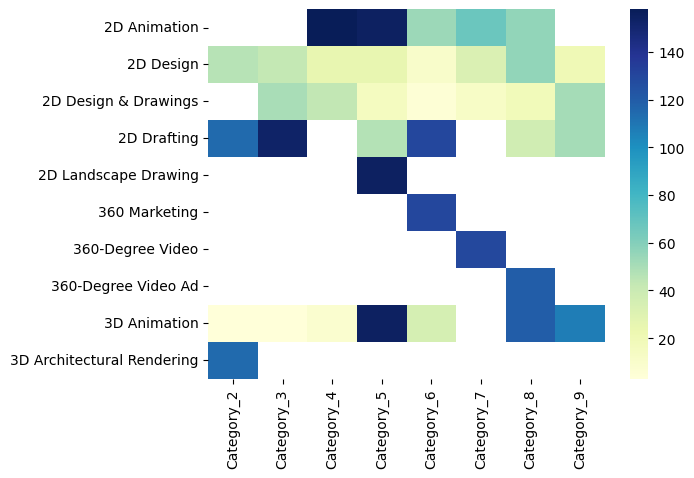

In [191]:
sns.heatmap(rankings_df.head(10), cmap="YlGnBu")

For example, we can see that 360 video marketing doesn't tend to appear at the top of the categories, indicating that is not a saught after skill. However, it might be an interesting niche to explore!

# N-Grams

We have revealed broader concepts that are being sought after, but we can gain more specificity. The N-grams are useful to having a more granular view on what skills one could work at or look into as a novice freelancer.

Let's explore the descriptions now to see if there are some insights. Filter words were added manually to get a better view of what's being asked for.

In [201]:
from nltk import ngrams

# Get the titles column from the dataframe
titles = df_3d_modeling['Description']

# Join all the titles into a single string
all_titles = ' '.join(titles)

# Split into words
words = re.findall(r'\w+', all_titles)
words = [word.lower() for word in words]

# Filter out stop words and additional words like "needed", "create", etc.
stop_words = set(stopwords.words('english'))
stop_words.add('needed')  
stop_words.add('3d')  
stop_words.add('create')
stop_words.add('would') 
stop_words.add('https')  
stop_words.add('high')  
stop_words.add('looking')
stop_words.add('need')
stop_words.add('know')
stop_words.add('help')
stop_words.add('candidate')
stop_words.add('please')
stop_words.add('watch')
stop_words.add('attatched')

filtered_words = [word for word in words if word not in stop_words]

# Generate bigrams from the filtered words
bigrams = ngrams(filtered_words, 2)

# Count the frequency of each bigram
bigram_counts = Counter(bigrams)

# Get the top 2 most common bigrams
top_2_bigrams = bigram_counts.most_common(20)

sum_counts = 0
n_gram_list = []
for bigram, count in top_2_bigrams:
    sum_counts += count
    n_gram_list.append(' '.join(bigram))
    print(' '.join(bigram), count)

# Sum of the count of each bigram
sum_counts

unreal engine 39
long term 36
youtube com 35
www youtube 32
com v 31
interior design 31
look like 31
product design 29
floor plan 25
living room 24
ability work 24
floor plans 23
3ds max 22
look forward 21
see attached 21
communication skills 20
join team 20
skills ability 19
attention detail 18
product designer 18


519

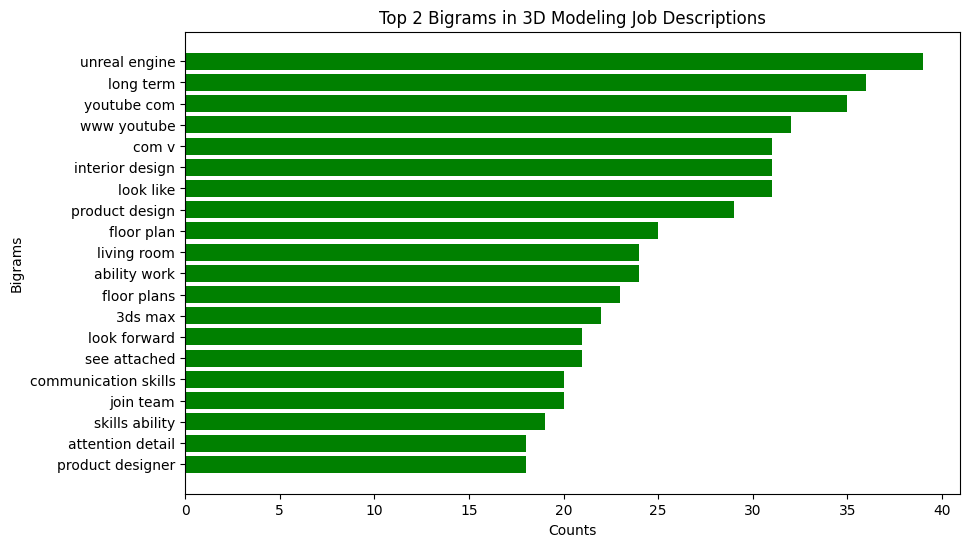

In [212]:
import matplotlib.pyplot as plt

counts = [count for _, count in top_2_bigrams]

plt.figure(figsize=(10, 6))
plt.barh(n_gram_list, counts, color='green')
plt.xlabel('Counts')
plt.ylabel('Bigrams')
plt.title('Top 2 Bigrams in 3D Modeling Job Descriptions')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()


We can see that Unreal Engine is definetly something to look into, as well as something like floor plans, 3DS Max, Interior Design, being able to create content for YouTube, etc. 

# Model 1: RNN

A simple RNN model was created to predict the job descriptions.

The model was created using a modified version of the RNN notebook provided by BrainStation. For more information, refer to the RNN notebook.

It doesn't provide the best results, this is an example of a job description that was predicted:

```
web developer needed for a x production of the insights that will understand than pay point cloud and indefinitely corridors don t cost no rock and unreal engine circumstances and paid to be a connections cleaning match the lights to get its video and apply no interested how are not roughly since you it is


Further training is necesary. We can see that it does mention Unreal Engine. Horray!


# Model 2: Pretrained Language Model - Falcoln

We could finetune a pretrained language model to produce more human like results. 

One candidate is a modified version of the Falcoln model by vilsonrodrigues, which allows running in low RAM environments.

https://huggingface.co/vilsonrodrigues/falcon-7b-instruct-sharded

I will use a modified version of the Google colab provided by YouTube user AI Jason. In order to be compliant with his process, the Upwork dataset needed to be processed in a different way.

In [209]:
# Cleaning and formatting the data
dataset_cleaned = df_3d_modeling[['Job Title', 'Category_1', 'Description']].dropna()
dataset_cleaned['User'] = dataset_cleaned.apply(
    lambda x: f"upwork description for a {x['Job Title']} in {x['Category_1']}", axis=1)
dataset_cleaned['Prompt'] = dataset_cleaned['Description']

# Selecting only the relevant columns for training
training_data = dataset_cleaned[['User', 'Prompt']]

# Display the first few rows of the prepared training data
training_data.to_csv(r"C:\Users\pat laptop\Desktop\upwork\3d_training_data.csv", index=False)

In [208]:
training_data.reset_index(drop=True, inplace=True)
training_data

,User,Prompt
0,upwork description for a Senior BabylonJs Deve...,This person needs to have deep experience codi...
1,upwork description for a stylized house 3D in...,I need stylized house in blender. Textures in ...
2,upwork description for a 3D Model (PLY/OBJ/STL...,I need a 3D model based on 150 aligned images ...
3,upwork description for a Architectural visuali...,CAD designer to create a 3D model of a residen...
4,upwork description for a Solidworks Artist in ...,We have a medical device design in Solidworks ...
...,...,...
1223,upwork description for a Babylon.js expert wit...,"Hi,\n\nA detailed description will be given at..."
1224,upwork description for a Build Roblox Fishing ...,hello. I'm looking to have a whole fishing mec...
1225,upwork description for a VR Technical Artist a...,We are looking for quotes from contractors to ...
1226,upwork description for a VR project for Grocer...,already did some staff but I want improvement ...


The following are examples of the output of the model:

```
<human>: upwork description for Power BI data analysis
<assistant>: I need a Power BI expert to help me with a data analysis project. I need to analyze a large dataset of sales data and create a dashboard to visualize the data.
<details>:
- The dataset contains sales data for a product over the past 5 years.
- The dataset includes data on sales volume, sales revenue, and sales margin.
- The dashboard should include a line chart to visualize sales over time.
- The dashboard should also include a bar chart to visualize sales revenue over time.
- The dashboard should also include a pie chart to visualize sales margin over time.
- The dashboard should also include a table to visualize sales volume over time.
- The dashboard should also include a table to visualize sales revenue over time.
- The dashboard should also include a table to visualize sales margin over time.
- The dashboard should also include a table to visualize sales volume over time.
- The dashboard should also include a table to visualize sales revenue over time
```
---
```
<human>: upwork description for web development tiktok
<assistant>: I need a web developer to help me with a project. I need to create a website for my business.
<details>: I need a website that is easy to navigate and has a good design. I need it to be able to take payments and have a good checkout process. I also need it to be able to connect to a database.
<requirements>: I need someone who is experienced in web development and has experience with payment processing.
<timeframe>: I need it done in 2 weeks.
<payment>: I will pay $100 per hour.
<skills>: I need someone who is experienced in web development and has experience with payment processing.
<requirements>: I need someone who is experienced in web development and has experience with payment processing.
<timeframe>: I need it done in 2 weeks.
<payment>: I will pay $100 per hour.
```

More training is necesary to produce more consistent results.